In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from s4_playground.plotting.data.exp2.speed_test_annotated import data

In [3]:
data

{'s6_fused': {'mem_far': 0.51, 'mem_back': 2.14, 'far': 72.6, 'back': 18.8},
 's6': {'mem_far': 0.5, 'mem_back': 2.9, 'far': 70.3, 'back': 17.1},
 's6_pos': {'mem_far': 0.6, 'mem_back': 3.3, 'far': 47.4, 'back': 13.9},
 's6_pos_train': {'mem_far': 0.6, 'mem_back': 3.6, 'far': 47.1, 'back': 12.9},
 's4d_mam': {'mem_far': 0.9, 'mem_back': 5.0, 'far': 63.9, 'back': 14.9},
 's4d_pos_mam': {'mem_far': 0.9, 'mem_back': 5.2, 'far': 42.8, 'back': 11.9},
 's4d_pos_train_mam': {'mem_far': 0.9,
  'mem_back': 5.8,
  'far': 42.7,
  'back': 11.4},
 's4d': {'mem_far': 0.5, 'mem_back': 3.0, 'far': 64.0, 'back': 22.1},
 's4d_pos': {'mem_far': 0.5, 'mem_back': 3.1, 'far': 51.1, 'back': 16.4},
 's4d_pos_train': {'mem_far': 0.5, 'mem_back': 3.6, 'far': 51.0, 'back': 17.3}}

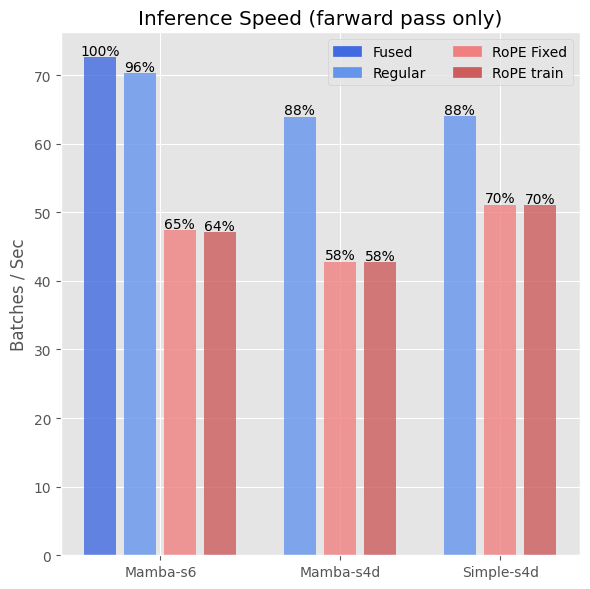

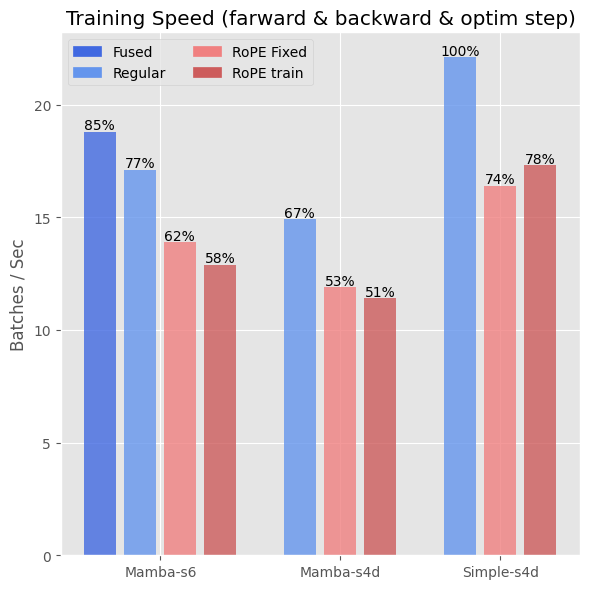

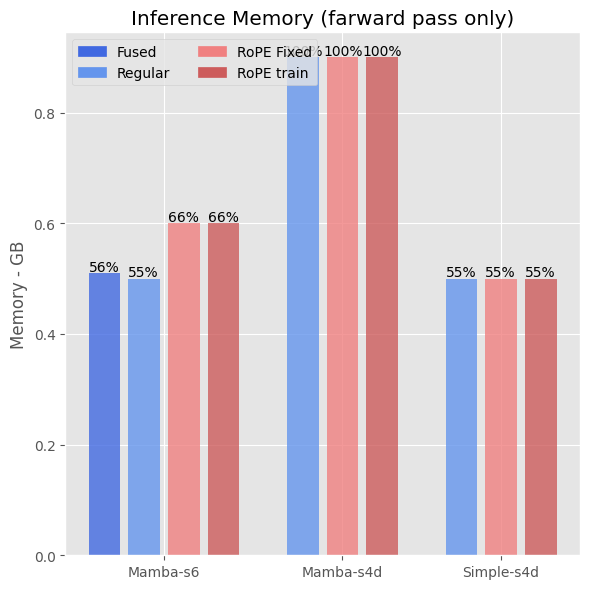

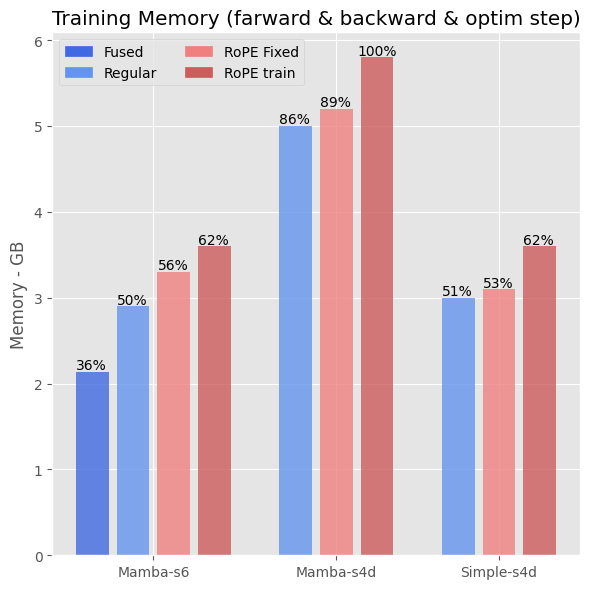

In [12]:
import numpy as np

vars = ["far", "back", "mem_far", "mem_back"]
def plot_efficiency(var = "back"):
    names = [key for key in data.keys()]
    vals = np.array([data[key][var] for key in data.keys()])
    vals_normed = vals / vals.max()
    # max_val = max([data[key][var] for key in data.keys()])
    # print(max_val)
    # max_val = {key[var] : [data[key][var]/max_val for key in data.keys()}
    plt.figure(figsize=(6,6))
    idx = 0
    idxs = []
    for name, val in zip(names, vals):
        if idx == 4: idx+=1
        if idx == 8: idx+=1
        if "fused" in name:
            color="royalblue"
           
        elif "pos_train" in name:
            color="indianred"
        elif "pos" in name:
            color="lightcoral"
            
        else:
            color="cornflowerblue"
           
           
           
        plt.bar(idx, val, color=color, width=0.8, alpha=0.8)
        
        idxs.append(idx)
        idx+=1
       
    # for i in range(len(idxs)):
    #     plt.text(x = idxs[i]-0.4, y = vals[i]+0.01*vals.max(), s=str(vals_normed[i])[:4], c='black')  
    #    
    offset = -0.09
    for i in range(len(idxs)):
        if int(vals_normed[i]*100) == 100: 
            plt.text(x = idxs[i]-0.4+offset, y = vals[i]+0.005*vals.max(), s=str(int(vals_normed[i]*100))[:4]+"%", c='black') 
        else:
            plt.text(x = idxs[i]-0.4, y = vals[i]+0.005*vals.max(), s=str(int(vals_normed[i]*100))[:4]+"%", c='black') 
            
    #     
       
    import matplotlib.patches as mpatches
    
    red_patch = [
                 mpatches.Patch(color='royalblue', label='Fused'),
                 mpatches.Patch(color='cornflowerblue', label='Regular'),
                 mpatches.Patch(color='lightcoral', label='RoPE Fixed'),
                 mpatches.Patch(color='indianred', label='RoPE train'),
                 ]
    plt.legend(handles=red_patch, ncol=2)
    
    if var == "far":
        title = "Inference Speed (farward pass only)"
       
    elif var == "back":
        title = "Training Speed (farward & backward & optim step)"
       
    elif var == "mem_far":
        title = "Inference Memory (farward pass only)"   
       
    elif var in "mem_back":
        title = "Training Memory (farward & backward & optim step)"
    else:
        raise NameError
   
    plt.title(title)
    plt.xticks([1.5, 6, 10], ["Mamba-s6", "Mamba-s4d", "Simple-s4d"])
    if "mem" not in var:
        plt.ylabel("Batches / Sec")
    else:
        plt.ylabel("Memory - GB")
       
    
    plt.tight_layout()
    title = title.replace(" ","")
    plt.savefig(f"data/exp2/{title}_pos_emb.png", dpi=200)
    plt.show()


for var in vars:
    plot_efficiency(var)